# Exploratory Data Analysis (EDA)


## Importing libraries

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Reading And Processing

In [72]:
df=pd.read_csv("C:\\Users\\owais\\OneDrive\\Desktop\\insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Checking if any null value

In [73]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## "Visualizing all the features against the charges using subplots."

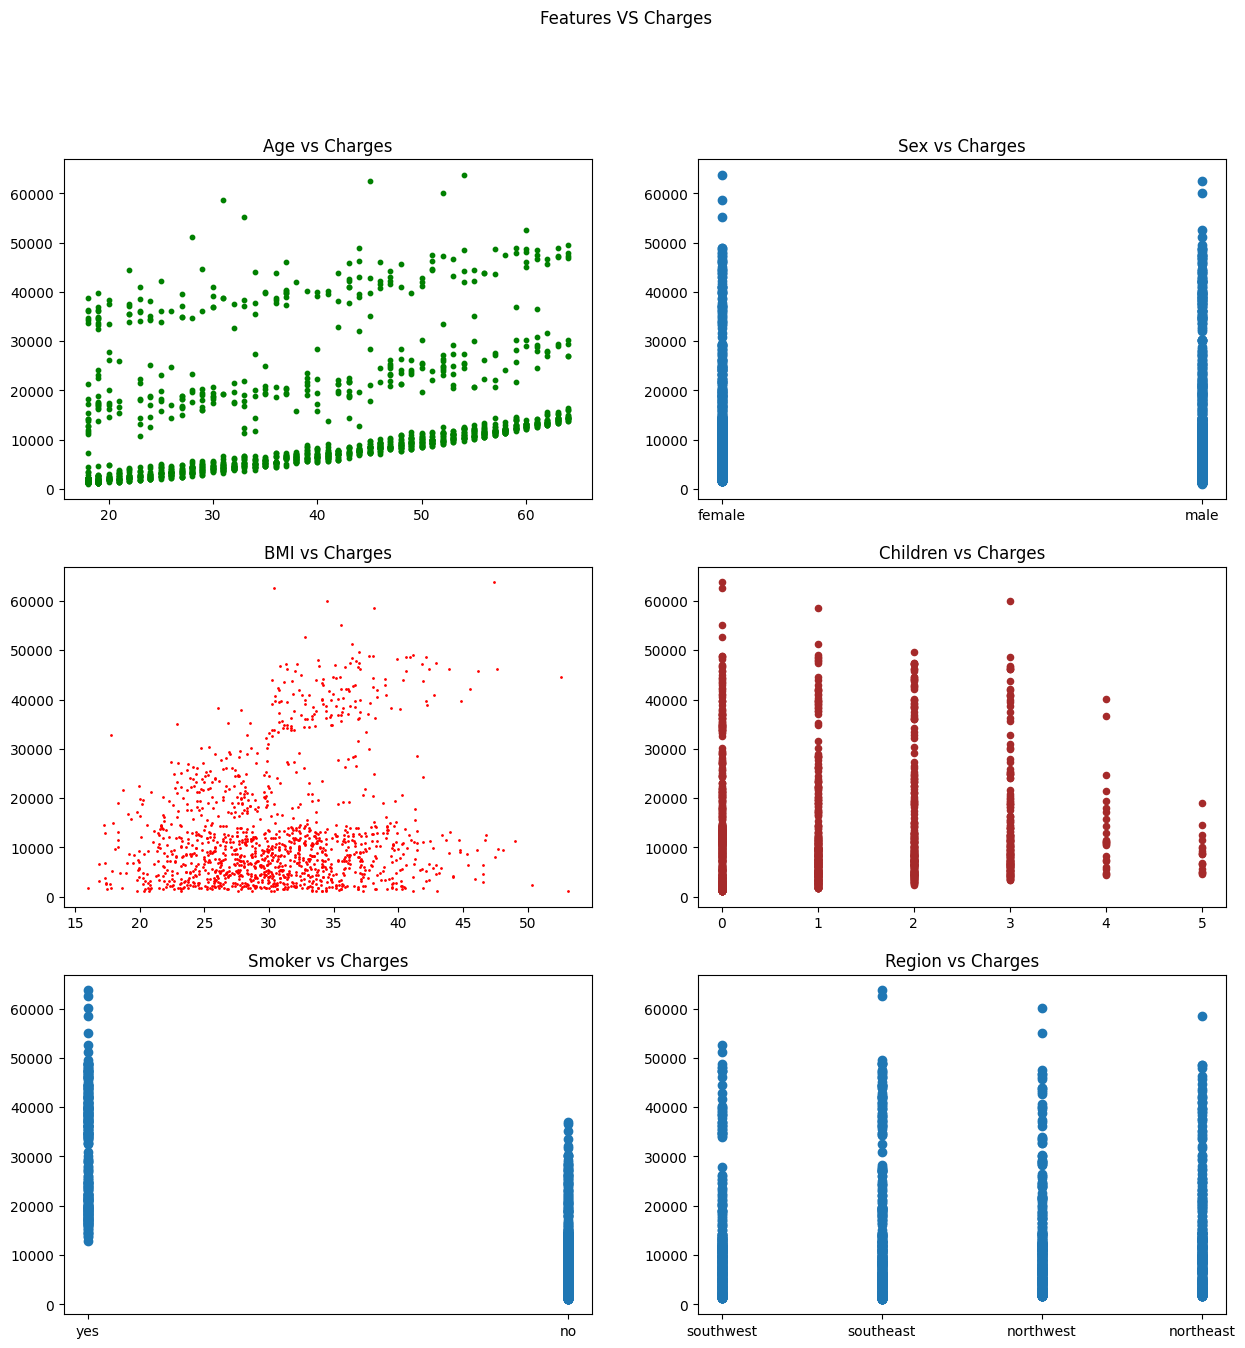

In [74]:
fig, axs= plt.subplots(3,2,figsize=(15,15))
fig.suptitle("Features VS Charges")
axs[0,0].scatter(df["age"],df["charges"],s=10,color="green")
axs[0,0].set_title("Age vs Charges")
axs[0,1].scatter(df["sex"],df["charges"])
axs[0,1].set_title("Sex vs Charges")
axs[1,0].scatter(df["bmi"],df["charges"],s=1,color="red")
axs[1,0].set_title("BMI vs Charges")
axs[1,1].scatter(df["children"],df["charges"],color="brown",s=20)
axs[1,1].set_title("Children vs Charges")
axs[2,0].scatter(df["smoker"],df["charges"])
axs[2,0].set_title("Smoker vs Charges")
axs[2,1].scatter(df["region"],df["charges"])
axs[2,1].set_title("Region vs Charges")
plt.show()


## Statistical analysis by comparing the mean charges across various subcategories within each feature.

In [75]:
# To see the  Average charges for Smokers and non-smokers 
print("="*60)
print(" Average charges for Smokers: ",df[df["smoker"]=="yes"]["charges"].mean())
print(" Average charges for non-smokers: ",df[df["smoker"]=="no"]["charges"].mean())

print("="*60)
#Calculate the average charges for different age range
print("="*60)
for age_range in[(0,25),(25,50),(50,100)]:
    lower_bound,upper_bound=age_range
    print("average charges for age range", age_range,":",df[(df["age"]>=lower_bound) & (df["age"]<upper_bound)]["charges"].mean())
    
print("="*60)

#Calculate the average charges for different BMI range
print("="*60)
for bmi_range in [(0, 18.5), (18.5, 24.9), (24.9, 29.9), (29.9, 34.9), (34.9, 50)]:  
    lower_bound, upper_bound = bmi_range  
    average_charges = df[(df["bmi"] >= lower_bound) & (df["bmi"] < upper_bound)]["charges"].mean()  
    print("Average charges for BMI range", bmi_range, ":", round(average_charges, 3)) 
print("="*60)

#Calculate the average charges for regions
print("="*60)
for region in df["region"].unique():
    print("average charges for regions:", region,":",df[df["region"] == region ]["charges"].mean())
print("="*60)

# calculate the average for Gender 
print("="*60)
print(" Average charges for male: ",df[df["sex"]=="male"]["charges"].mean())
print(" Average charges for female: ",df[df["sex"]=="female"]["charges"].mean())
print("="*60)


 Average charges for Smokers:  32050.23183153284
 Average charges for non-smokers:  8434.268297856204
average charges for age range (0, 25) : 9011.340317334532
average charges for age range (25, 50) : 12382.503459925927
average charges for age range (50, 100) : 17902.552070363636
Average charges for BMI range (0, 18.5) : 8852.201
Average charges for BMI range (18.5, 24.9) : 10379.5
Average charges for BMI range (24.9, 29.9) : 11030.332
Average charges for BMI range (29.9, 34.9) : 14119.594
Average charges for BMI range (34.9, 50) : 17142.827
average charges for regions: southwest : 12346.937377292308
average charges for regions: southeast : 14735.411437609888
average charges for regions: northwest : 12417.57537396923
average charges for regions: northeast : 13406.384516385804
 Average charges for male:  13956.751177721893
 Average charges for female:  12569.578843835347


In [76]:
# the "sex" And "region" columns has very less impact on "charges hence its better to drop them".

In [77]:
# So,we drop the sex And region columns
df=df.drop(columns=["sex","region"])
df

,age,bmi,children,smoker,charges
0,19,27.900,0,yes,16884.92400
1,18,33.770,1,no,1725.55230
2,28,33.000,3,no,4449.46200
3,33,22.705,0,no,21984.47061
4,32,28.880,0,no,3866.85520
...,...,...,...,...,...
1333,50,30.970,3,no,10600.54830
1334,18,31.920,0,no,2205.98080
1335,18,36.850,0,no,1629.83350
1336,21,25.800,0,no,2007.94500


In [78]:
print("total number of sample",len(df))

total number of sample 1338


## Removing outliers using the standard deviation approach.

In [79]:
# outliers is calculated as, if the Z-score of each data point |xi-x(mean)|/x(std)<3 

In [80]:
df=df[(np.abs(df["charges"]-df["charges"].mean())/df["charges"].std() <3)]
df=df[(np.abs(df["age"]-df["age"].mean())/df["age"].std() <3)]
df=df[(np.abs(df["bmi"]-df["bmi"].mean())/df["bmi"].std() <3)]
df=df[(np.abs(df["children"]-df["children"].mean())/df["children"].std() <3)]

In [81]:
print(" After removing outliers, total number of sample: ",len(df))

 After removing outliers, total number of sample:  1309


In [83]:
# As machine learning model takes only  numerical data hence replace the smoker  column data of yes and no with 1 and 0
df["smoker"] = df["smoker"].replace({"yes": 1, "no": 0})
df

,age,bmi,children,smoker,charges
0,19,27.900,0,1,16884.92400
1,18,33.770,1,0,1725.55230
2,28,33.000,3,0,4449.46200
3,33,22.705,0,0,21984.47061
4,32,28.880,0,0,3866.85520
...,...,...,...,...,...
1333,50,30.970,3,0,10600.54830
1334,18,31.920,0,0,2205.98080
1335,18,36.850,0,0,1629.83350
1336,21,25.800,0,0,2007.94500
